## HW 10
### Ian Hirsch

### 1.)

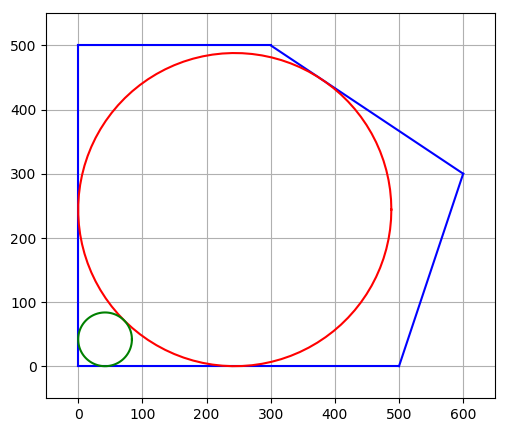

Area = 192588.76902112327
center1 = [244.029, 244.029]
center2 = [41.8687, 41.8687]


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000039210550>

In [166]:
using JuMP, Ipopt, LinearAlgebra

A = [ 3 -1; 2 3; 0  1; -1 0; 0 -1]
b = [1500; 2100; 500; 0; 0]

m = Model(solver=IpoptSolver(print_level=0))

@variable(m, c1[1:2])
@variable(m, c2[1:2])
@variable(m, r1 >=0)
@variable(m, r2 >=0)
for i = 1:size(A,1)
    @constraint(m, A[i,:]'*c1 + (r1)*norm(A[i,:]) <= b[i])
    @constraint(m, A[i,:]'*c2 + (r2)*norm(A[i,:]) <= b[i])
end
@NLconstraint(m, (c2[1]-c1[1])^2 + (c2[2]-c1[2])^2 >= (r1+r2)^2)

@NLobjective(m, Max, r1^2+r2^2)

solve(m)
c = getvalue(c1)
r = getvalue(r1)
c2 = getvalue(c2)
r2 = getvalue(r2)

println("Area = ", pi*(r^2 + r2^2))
println("center1 = ",c)
println("center2 = ", c2)


using PyPlot
function plot_site()
    plot([0,0], [0,500], "b-")
    plot([0,500], [0,0], "b-")
    plot([500,600], [0,300],"b-")
    plot([300,600], [500,300],"b-")
    plot([0,300], [500,500],"b-")
    axis("image")
    axis([-.5,6.5,-.5,5.5]*100)
    grid()
end
figure(figsize=(6,5))
plot_site()
t = range(0,stop=2*pi,length=100)
x1 = c;
r1 = r
x2 = c2;
r2 = r2
plot(x1[1] .+ r1*cos.(t), x1[2] .+ r1*sin.(t), "r")
plot(x2[1] .+ r2*cos.(t), x2[2] .+ r2*sin.(t), "g")

This does not appear to be the optimal solution as it looks like there is more space near the vertex at [600,300].

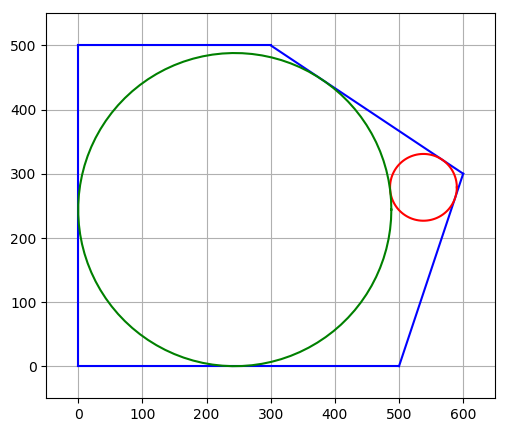

Area = 195590.54592783662
center1 = [538.057, 278.747]
center2 = [244.029, 244.029]


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003927DA58>

In [167]:
using JuMP, Ipopt, LinearAlgebra

A = [ 3 -1; 2 3; 0  1; -1 0; 0 -1]
b = [1500; 2100; 500; 0; 0]

m = Model(solver=IpoptSolver(print_level=0))

@variable(m, c1[1:2])
@variable(m, c2[1:2])
@variable(m, r1 >=0)
@variable(m, r2 >=0)
setvalue(c1,[538.057, 278.747])
setvalue(c2, [244.029, 244.029])
for i = 1:size(A,1)
    @constraint(m, A[i,:]'*c1 + (r1)*norm(A[i,:]) <= b[i])
    @constraint(m, A[i,:]'*c2 + (r2)*norm(A[i,:]) <= b[i])
end
@NLconstraint(m, (c2[1]-c1[1])^2 + (c2[2]-c1[2])^2 >= (r1+r2)^2)

@NLobjective(m, Max, r1^2+r2^2)

solve(m)

c = getvalue(c1)
r = getvalue(r1)
c2 = getvalue(c2)
r2 = getvalue(r2)
println("Area = ", pi*(r^2 + r2^2))

println("center1 = ", c)
println("center2 = ", c2)

using PyPlot
function plot_site()
    plot([0,0], [0,500], "b-")
    plot([0,500], [0,0], "b-")
    plot([500,600], [0,300],"b-")
    plot([300,600], [500,300],"b-")
    plot([0,300], [500,500],"b-")
    axis("image")
    axis([-.5,6.5,-.5,5.5]*100)
    grid()
end
figure(figsize=(6,5))
plot_site()
t = range(0,stop=2*pi,length=100)
x1 = c;
r1 = r
x2 = c2;
r2 = r2
plot(x1[1] .+ r1*cos.(t), x1[2] .+ r1*sin.(t), "r")
plot(x2[1] .+ r2*cos.(t), x2[2] .+ r2*sin.(t), "g")

I used Ipopt to solve the problem. Ipopt uses an interior point method in conjunction with Quasi-Newton method and Newton Iteration. Because of this, like many other solvers, local optimum can be found without being true global optimum while the solver thinks it is the optimal value. By setting a guess value, we can slide towards a different local optimum which may be more preferential to the first solution. The area of the second solution using a guess value is a better solution.

### 2.)

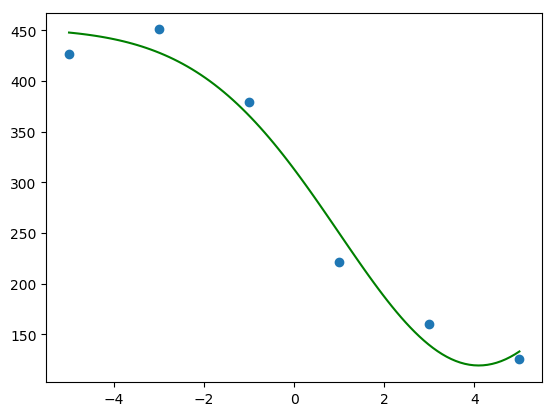

Optimal
k_1 = 452.52791051071495
k_2 = -139.6320987938264
k_3 = -0.051872773179647495
k_4 = 0.4249029912465752


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000037FFE0F0>

In [161]:
fert_rate = [-5, -3, -1, 1, 3, 5]
crop_yield = [427, 451,379, 221, 160, 126]

using JuMP, Ipopt, PyPlot

m = Model(solver=IpoptSolver(print_level=0))
@variable(m, k[1:4])
setvalue(k, [500, -200, -0.1, 0.5])
@NLobjective(m, Min, sum((crop_yield[i] - (k[1]+k[2]*exp(k[3]*fert_rate[i]^2 + k[4]*fert_rate[i])))^2 for i in 1:6))

status = solve(m)
println(status)
k = getvalue(k)
for i in 1:4
    println("k_", i," = ", k[i])
end
scatter(fert_rate,crop_yield)
y = k[1] .+ k[2]*exp.(k[3]*xrange.^2 .+ k[4].*xrange)
plot(xrange, y, color="green")